Downloading: "http://gandissect.csail.mit.edu/models/proggan_livingroom-5ef336dd.pth" to C:\Users\Janspiry/.cache\torch\hub\checkpoints\proggan_livingroom-5ef336dd.pth


  0%|          | 0.00/70.0M [00:00<?, ?B/s]


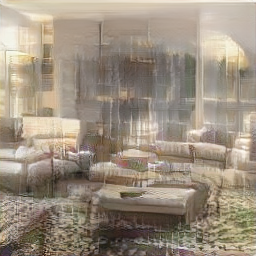
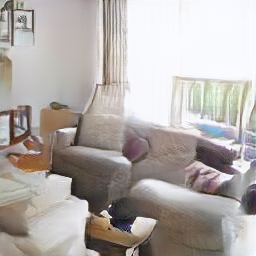
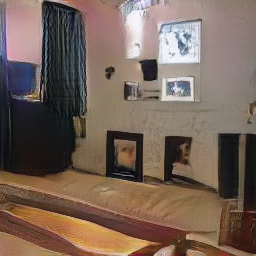
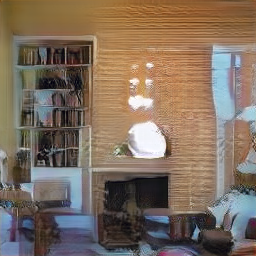
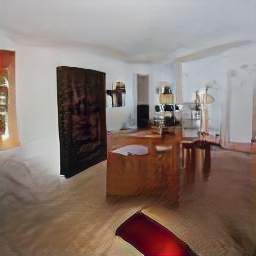
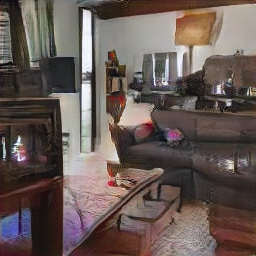
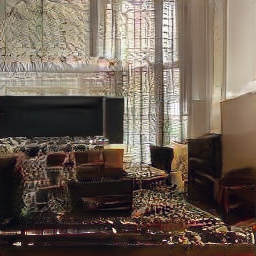
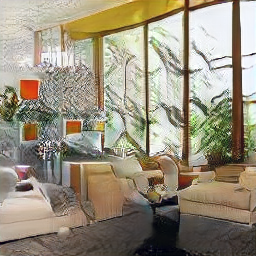
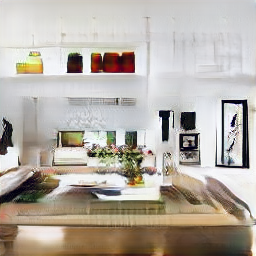
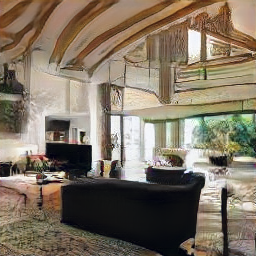
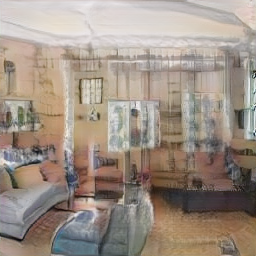
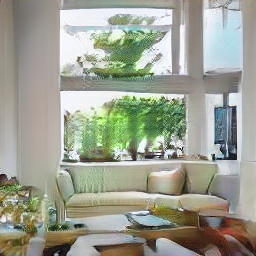
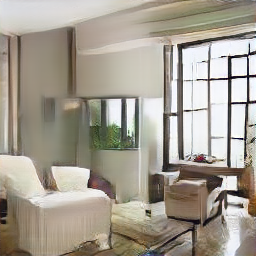
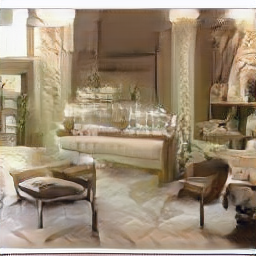
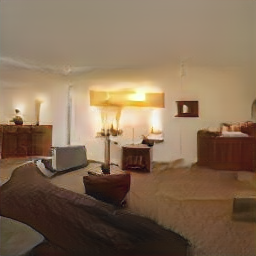
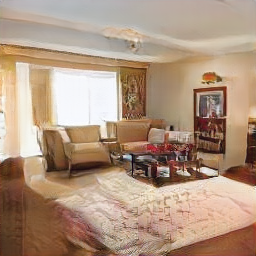
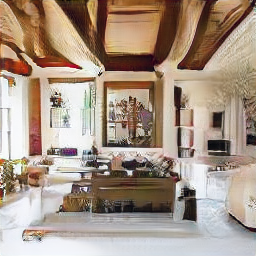
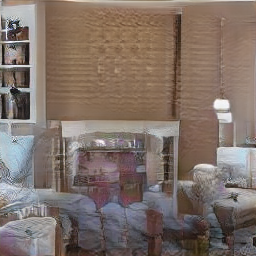
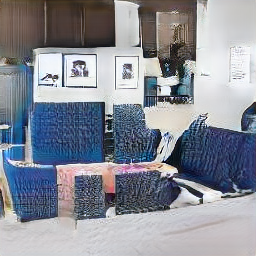
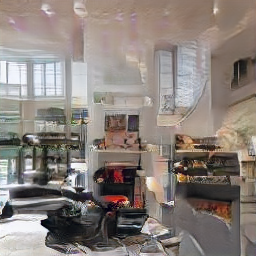
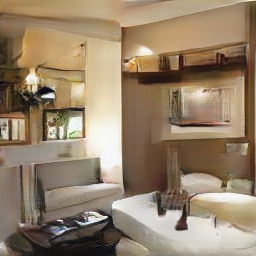
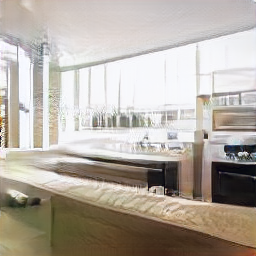
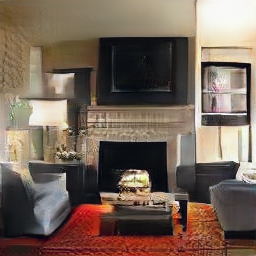
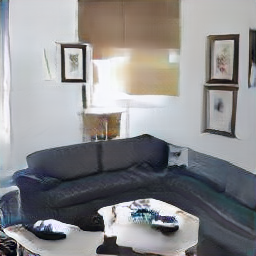
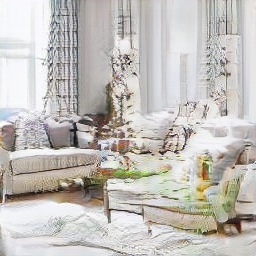
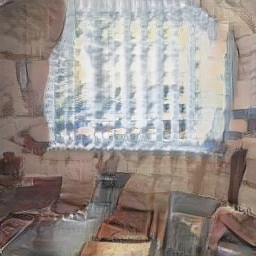
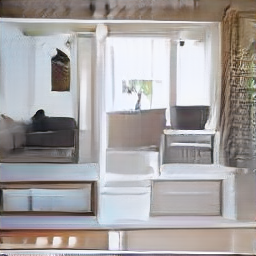
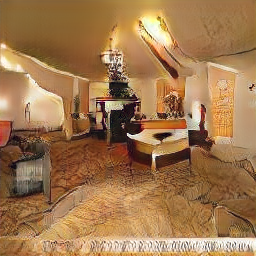
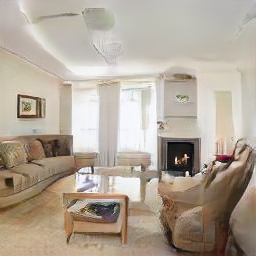
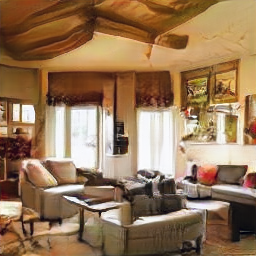
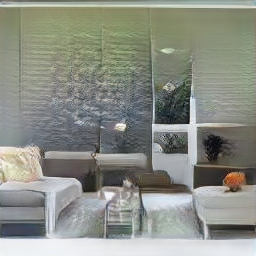
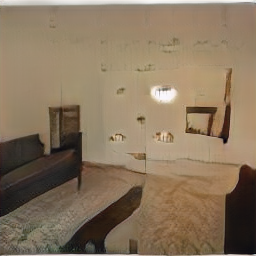

In [6]:

import sys, torch
sys.path.append('G:/GithubRepo/rewriting')

from utils import zdataset, show, labwidget
from rewrite import ganrewrite, rewriteapp
import torch, copy, os, json
from torchvision.utils import save_image
import utils.proggan
# from utils.stylegan2 import load_seq_stylegan
# import utils.stylegan2
# Choices: ganname = 'stylegan' or ganname = 'proggan'
ganname = 'proggan'

# Choices: modelname = 'church' or faces' or 'horse' or 'kitchen'
modelname = 'livingroom'

# layer 6,7,8,9,10 work OK for different things.
# layer 8 is good for trees or domes in churches, and hats on horses
# layer 6 is good for smiles on faces
# layer 10 is good for hair on faces
layernum = 8

# Number of images to sample when gathering statistics.
size = 1000

# Make a directory for caching some data.
layerscheme = 'default'
expdir = 'results/pgw/%s/%s/%s/layer%d' % (ganname, modelname, layerscheme, layernum)
os.makedirs(expdir, exist_ok=True)

# Load (and download) a pretrained GAN
if ganname == 'stylegan':
    model = load_seq_stylegan(modelname, mconv='seq', truncation=0.50)
    Rewriter = ganrewrite.SeqStyleGanRewriter
elif ganname == 'proggan':
    model = utils.proggan.load_pretrained(modelname)
    Rewriter = ganrewrite.ProgressiveGanRewriter
    
# Create a Rewriter object - this implements our method.
zds = zdataset.z_dataset_for_model(model, size=size)
gw = Rewriter(
    model, zds, layernum, cachedir=expdir,
    low_rank_insert=True, low_rank_gradient=False,
    use_linear_insert=False,  # If you set this to True, increase learning rate.e
    tight_paste=False,
    alpha_area=True,
    key_method='zca')


# Display a user interface to allow model rewriting.
savedir = f'masks/{ganname}/{modelname}'
interface = rewriteapp.GanRewriteApp(gw, size=256, mask_dir=savedir, num_canvases=32, save_img_sum=0)
show(interface)